# Statistical Arbitrage: Cointegration Testing and Vector Error Correction in Crypto Market.

#### Summary

- In this project, I apply two cointegration tests, the Engle-Granger and Johansen’s test to test for short and long run equilibrium relationship between high frequency minute by minute close price data on three cryptocurrencies (BTC/ETH/BNB). I then applied the Vector Error Correction Model in order to infer and test for a linear combination of the cointegrated pair of coins, the aim was to study the relationship of the cointegrated pairs in hope to infer information to further develop a statistical arbitrage trading strategy. 

The goal of this project is NOT to build a trading strategy, instead it is to test and model the long term relationship between (BTC/ETH/BNB), by studying the relationship and systematically infering information regarding whether a cointegrating relationship exist, we can then use this information to build a systematic trading strategy for future work. 


## Basic Definitions

- Statistical Arbitrage: group of trading strategies that relies on statistical models and algorithmic methods to extract trading signals from market data, usually medium or high frequency data such as hourly, or min by min price data of financial instruments. In the seminal paper Statistical Arbitrage in the US Equities by Avellaneda and Lee [1] defined a StatArb strategy with features are follows: 1) trading signals are systematic or rule based as opposed to driven by fundamentals, 2) the trading book is market neutral, meaning it has zero beta with the market, 3) the mechanism for generating excess returns is statistical. The idea is to make many bets with positive expected returns, taking advantage of diversification across stocks in order to produce a low volatility strategy which is uncorrelated with the market. 


- Cointegration: The concept of co-integration was developed by two econometricians Engle and Granger, they observed by examining multivariate series in order to determine statistically if there is a cause and effect relationship between the variables represented by the time series, they observed that even though two time series are nonstationary, it is possible that in some instances, a specific linear combination of the two is actually stationary, that is the two time series may somewhat move together in a similar manner [2].

To present error correction more clearly, let Xt   be the white noise process corresponding to the time series Xt. While Yt is the white noise process corresponding to the time series Yt. Hence the error correction representation will be as follows: 

Yt - Yt-1 = Y(Yt-1- gXt-1) + Yt     (1)


Xt - Xt-1 = X(Yt-1- gXt-1) + Xt     (2)


In equation 3, the left hand side is the increment to the time series at each time step, whilst the right hand side is the sum of two expressions, the error correction and white noise part respectively. The error correction part Y(Yt-1- gXt-1)  from the initial equation where the term Yt-1- gXt-1represents the deviation from the long run equilibrium, where the equilibrium value in this case is zero and the g is the coefficient of cointegration. 𝝰Y is the error correction rate which is the indication of the speed with which the time series corrects itself to maintain equilibrium. Hence as the two time series evolve through time, deviations from the long run equilibrium are caused by the white noise term ƐYt. 




### Data: 

- Now let us delve into the data. The data that will be tested includes 3 cryptocurrencies, Bitcoin, Ethereum and Binance Coin. The data was obtained from bloomberg terminal as minute by minute close price data from 01/04/2022 till 30/08/2022. The cryptocurrency market is open 24 hours, 7 days a week, hence data captured starts from 9:01:00 on 01/04/2022 all the way till 18:28:00 on 30/08/2022. The count for each cryptocurrency is 217,856 close price data points. After downloading the data I utilized Python and Pandas dataframe to clean the data and run all the necessary tests. 

- Below is a snapshot of how the dataset looks like, where XETUSD is the ticker name for Ethereum (ETH), XBNBUSD is the ticker for Binance Coin (BNB) while XBTUSD is the ticker for Bitcoin (BTC)


In [1]:
import pandas as pd

df = pd.read_excel('close price min basket.xlsx')

In [2]:
df = df.drop(['Dates.1', 'Dates.2', 'Dates.3', 'Dates.4', 'Dates.5'], axis=1)

In [3]:
df = df.set_index('Dates')

In [4]:
df = df.fillna(method='ffill') # we fill the missing values with the forward value. 


In [66]:
# I focus on BTC, ETH and BNB as they are the three cryptocurrencies with the largest mareket cap in the period of the research 
dff = df.drop(['XRP Curncy', 'XLCUSD Curncy', 'XTHUSD Curncy'], axis=1) 

dff

,XETUSD Curncy,XBNUSD Curncy,XBTUSD Curncy
Dates,,,
2022-04-01 09:01:00,3282.34,371.91,45063.02
2022-04-01 09:02:00,3283.32,371.94,45092.13
2022-04-01 09:03:00,3283.42,371.98,45127.57
2022-04-01 09:04:00,3287.11,372.15,45154.20
2022-04-01 09:05:00,3284.35,371.92,45122.00
...,...,...,...
2022-08-30 18:24:00,1481.15,113.21,19621.21
2022-08-30 18:25:00,1481.60,113.21,19626.27
2022-08-30 18:26:00,1482.59,113.12,19639.75


### Normality Test 

I run the normality test in order to understand the nature of the how the dataset is distributed.

As we can see from the results below non of the coins are normally distributed and the null is rejected, Data is non Gaussian. 

In [383]:
print('Normality test for ETH: ')

stat,p = stats.normaltest(dff['XETUSD Curncy'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')
    


Normality test for ETH: 
Statistics = 26032.191, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [385]:
print('Normality test for BNB: ')

stat,p = stats.normaltest(dff['XBNUSD Curncy'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')
    

Normality test for BNB: 
Statistics = 30458.445, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [386]:
print('Normality test for BTC: ')

stat,p = stats.normaltest(dff['XBTUSD Curncy'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Data looks non-Gaussian (reject null hypothesis)')
    

Normality test for BTC: 
Statistics = 34511.322, p=0.000
Data looks non-Gaussian (reject null hypothesis)


In [21]:
from scipy import stats

count   217856.00
mean       187.62
std         83.76
min         95.63
25%        118.68
50%        146.43
75%        258.19
max        382.93
Name: XBNUSD Curncy, dtype: float64

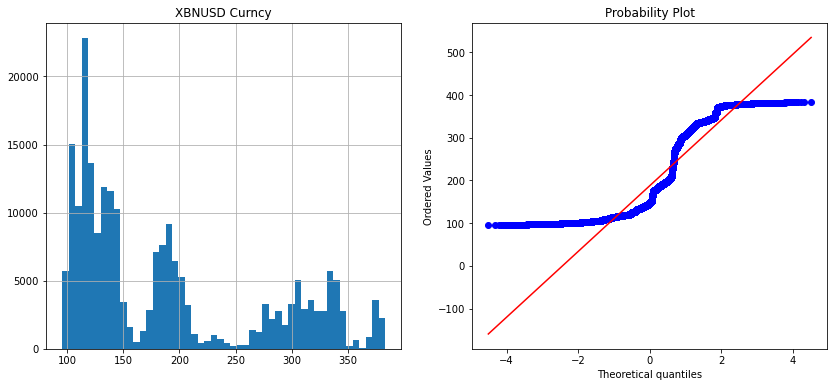

In [277]:
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dff['XBNUSD Curncy'].hist(bins=50)
plt.title('XBNUSD Curncy')
plt.subplot(1,2,2)
stats.probplot(dff['XBNUSD Curncy'], plot=plt);
dff['XBNUSD Curncy'].describe().T

count   217856.00
mean     28339.43
std       8054.24
min      17611.14
25%      21382.24
50%      24392.00
75%      33644.22
max      47420.29
Name: XBTUSD Curncy, dtype: float64

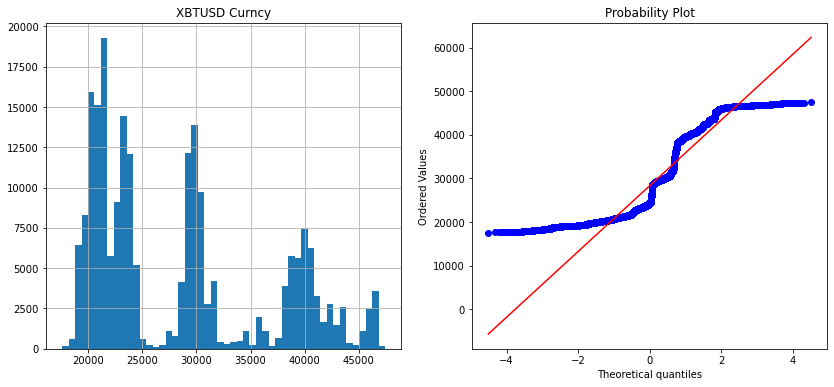

In [278]:
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dff['XBTUSD Curncy'].hist(bins=50)
plt.title('XBTUSD Curncy')
plt.subplot(1,2,2)
stats.probplot(dff['XBTUSD Curncy'], plot=plt);
dff['XBTUSD Curncy'].describe().T

count   217856.00
mean      1946.26
std        703.10
min        884.52
25%       1465.24
50%       1777.20
75%       2460.96
max       3579.20
Name: XETUSD Curncy, dtype: float64

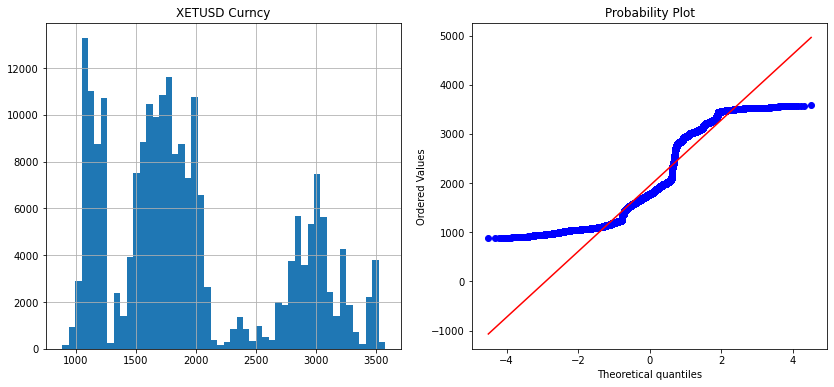

In [279]:
pd.options.display.float_format = "{:.2f}".format
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
dff['XETUSD Curncy'].hist(bins=50)
plt.title('XETUSD Curncy')
plt.subplot(1,2,2)
stats.probplot(dff['XETUSD Curncy'], plot=plt);
dff['XETUSD Curncy'].describe().T

### Plot and Correlation 

- Below I plot the normalised close price for all three coins and I also calcualte the correlation coefficient for all coins. As we can observe the coins are highly correlated especially BTC/BNB.

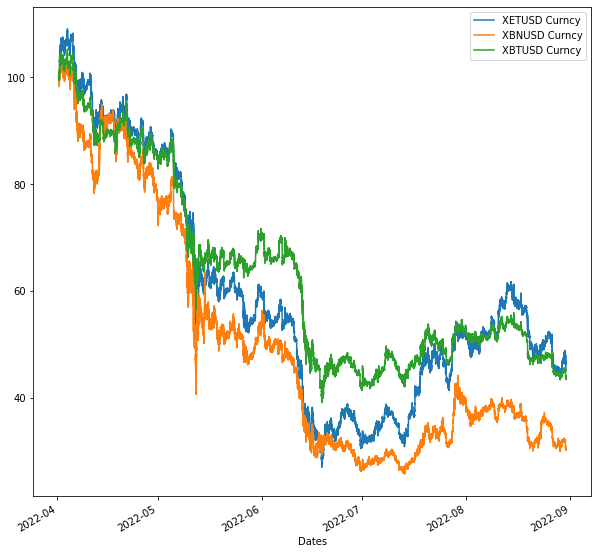

In [22]:
import matplotlib.pyplot as plt

(dff / dff.iloc[0] * 100).plot(figsize=(10,10))
title = 'Log Prices for Assets'
plt.show()

In [373]:
corr = dff.corr()
corr.style.background_gradient(cmap='coolwarm')

,XETUSD Curncy,XBNUSD Curncy,XBTUSD Curncy
XETUSD Curncy,1.000000,0.974514,0.967328
XBNUSD Curncy,0.974514,1.000000,0.989231
XBTUSD Curncy,0.967328,0.989231,1.000000


# Method 

The methodology for this experiment will be as follows: 

1. Conduct ADF test followed by ACF plot for each crypto currency in order to determine stationarity.

2. Run the Engle-Granger Cointegration test for all pairs.

3. Conduct Granger Causality test.

4. Run the Johansen cointegration test to determine the rank.

5. Fit the model using the Vector Error Correction Model. 

6. Plot the Impulse response function. 

7. Predict.

8. Evaluate forecast accuracy.


#### 1) Testing for Stationarity using ADF test and ACF plot (Auto Correlation Function). 

In [46]:
eg_test = engle_granger(df['XETUSD Curncy'], df['XBNUSD Curncy'], trend="ctt")
eg_test

Test Statistic,-4.713
P-value,0.010
ADF Lag length,9
Estimated Root ρ (γ+1),1.000


In [47]:
eg_test.cointegrating_vector

XETUSD Curncy      1.000000e+00
XBNUSD Curncy     -1.014980e+01
const              2.563882e+02
trend             -1.715552e-03
quadratic_trend   -7.048102e-09
dtype: float64

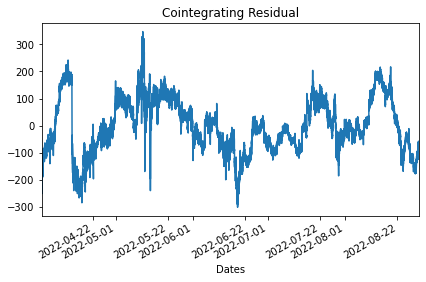

In [48]:
fig1 = eg_test.plot()

In [25]:
eg_tes = engle_granger(df['XBTUSD Curncy'], df['XLCUSD Curncy'], trend="n")
eg_tes

Test Statistic,-2.112
P-value,0.196
ADF Lag length,16
Estimated Root ρ (γ+1),1.000


In [34]:
eg_te = engle_granger(df['XBTUSD Curncy'], df['XLCUSD Curncy'], trend='ct')
eg_te

Test Statistic,-2.189
P-value,0.686
ADF Lag length,16
Estimated Root ρ (γ+1),1.000


In [29]:
eg_te.cointegrating_vector

XBTUSD Curncy        1.000000
XLCUSD Curncy     -261.206861
const           -13684.658188
trend                0.035830
dtype: float64

In [35]:
eg_test = engle_granger(df['XETUSD Curncy'], df['XBNUSD Curncy'], trend="ctt")
eg_test

Test Statistic,-4.713
P-value,0.010
ADF Lag length,9
Estimated Root ρ (γ+1),1.000


In [36]:
eg_test.cointegrating_vector

XETUSD Curncy      1.000000e+00
XBNUSD Curncy     -1.014980e+01
const              2.563882e+02
trend             -1.715552e-03
quadratic_trend   -7.048102e-09
dtype: float64

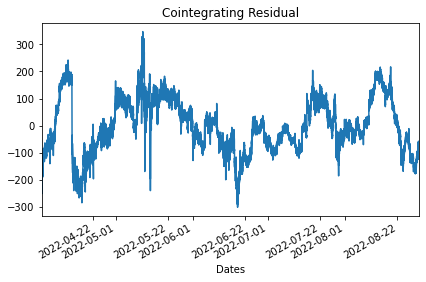

In [37]:
fig = eg_test.plot()

## ADF TEST/ COINTEGRATION TEST/ ERROR CORRECTION MODEL

In [6]:
dff

,XETUSD Curncy,XBNUSD Curncy,XBTUSD Curncy
Dates,,,
2022-04-01 09:01:00,3282.335,371.91,45063.02
2022-04-01 09:02:00,3283.325,371.94,45092.13
2022-04-01 09:03:00,3283.420,371.98,45127.57
2022-04-01 09:04:00,3287.105,372.15,45154.20
2022-04-01 09:05:00,3284.350,371.92,45122.00
...,...,...,...
2022-08-30 18:24:00,1481.147,113.21,19621.21
2022-08-30 18:25:00,1481.603,113.21,19626.27
2022-08-30 18:26:00,1482.585,113.12,19639.75


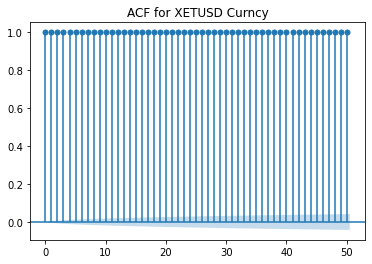

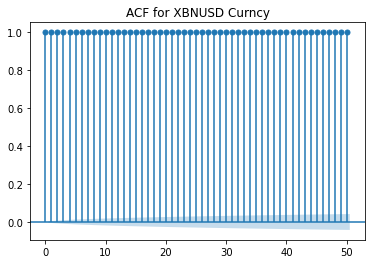

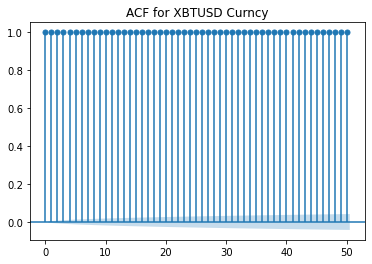

In [78]:
# autocorrelation 
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in dff:
    plot_acf(dff[i], lags=50)
    plt.title('ACF for %s' % i)
    plt.show()

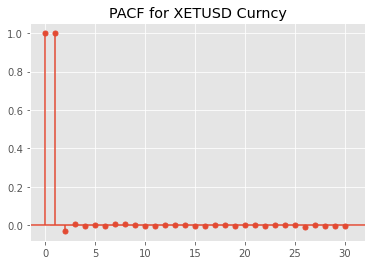

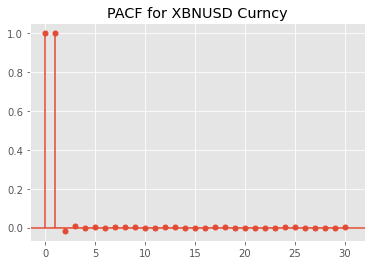

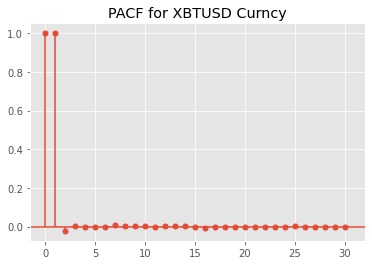

In [334]:
for i in dff:
    plot_pacf(dff[i], lags=30)
    plt.title('PACF for %s' % i)
    plt.show()

- As we can observe above, the autocorrelation function does not exhibit as geometric decrease hence it is non stationary. 


- Below I run the ADF test for all three coins. By looking at the results we can see that the ADF test confirms that the coins are all non stationary. 


- Based upon this we can now move on the Engle-Granger Cointegration test to test whether two non stationary time series can exhibit a stationary relationship.

In [330]:
#XETUSD Curncy	XBNUSD Curncy	XBTUSD Curncy
ATT = ADF(dff['XETUSD Curncy'], trend='c')

print('ADF test for ETH: ', ATT)

ADF test for ETH:     Augmented Dickey-Fuller Results   
Test Statistic                 -1.802
P-value                         0.380
Lags                               71
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [329]:
ATT = ADF(dff['XBNUSD Curncy'], trend='c')

print('ADF test for BNB: ', ATT)

ADF test for BNB:     Augmented Dickey-Fuller Results   
Test Statistic                 -2.060
P-value                         0.261
Lags                               82
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [331]:
ATT = ADF(dff['XBTUSD Curncy'], trend='c')

print('ADF test for BTC:', ATT)

ADF test for BTC:    Augmented Dickey-Fuller Results   
Test Statistic                 -1.815
P-value                         0.373
Lags                               73
-------------------------------------

Trend: Constant
Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### Engle-Granger Cointegration test

- To re-iterate the Engle-Granger test is a  two step test that first estimates the cross sectional regression and then tests the residuals from the two regression (in our case it is the pair of coins) using an Augmented Dickey-Fuller distribution with specified critical values. The regress is as follows: 

Yt = Xt + Dt  + t

Where Yt and Xt are the two time series being tested for cointegration and Dt are a set of deterministic regressors that might include a constant, time trend or quadratic time trend.

This test will confirm if the two non stationary time series exhibit a long term relationship if taken in a specific linear combination is stationary. 

More formally if Yt and Xt are two non stationary time sereis integrated of order I(1). Then if there exists a non zero vector g such that Yt-gXt is stationry, then the two time series are said to be cointegrated or order I(0). 

In [356]:
#eth/bnb co integration test 
eg_test = engle_granger(dff['XETUSD Curncy'], dff['XBNUSD Curncy'], trend='ct')

print('Engle Granger Test for ETH/ BNB: ', eg_test)

# reject the null and accept the alternative that a cointegration relationship exists between ETH/BNB

Engle Granger Test for ETH/ BNB:  Engle-Granger Cointegration Test
Statistic: -4.8165962080886295
P-value: 0.0018420315850378695
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 9
Trend: c
Estimated Root ρ (γ+1): 0.9996608986844948
Distribution Order: 1


Cointegration Residual for ETH/BNB


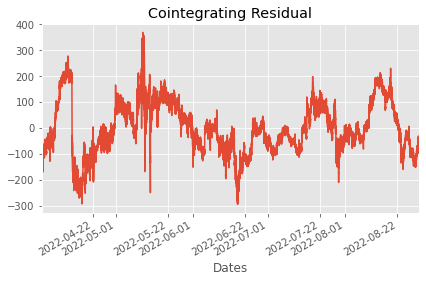

In [357]:
#eth bnb residual plot 

fig = eg_test.plot()

print('Cointegration Residual for ETH/BNB') 

In [110]:
#cointegration vector 

eg_test.cointegrating_vector

XETUSD Curncy      1.000000
XBNUSD Curncy    -10.668811
const            474.384473
trend             -0.003847
dtype: float64

In [ ]:
#bnb/eth cointegration test

In [346]:
eg_test = engle_granger(dff['XBNUSD Curncy'], dff['XETUSD Curncy'], trend='ct')

print('Engle Granger Test for BNB/ ETH: ', eg_test)

## reject the null and accept the alternative that a cointegration relationship exists between BNB/ETH

Engle Granger Test for BNB/ ETH:  Engle-Granger Cointegration Test
Statistic: -4.916174213630308
P-value: 0.001257615033343511
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 9
Trend: c
Estimated Root ρ (γ+1): 0.9996517280322007
Distribution Order: 1


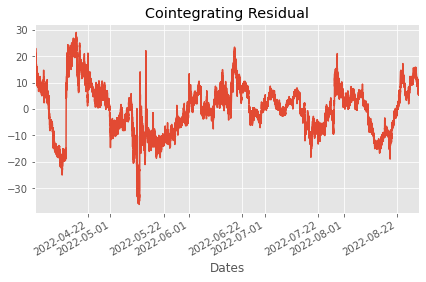

In [347]:
fig = eg_test.plot()

In [104]:
eg_test.cointegrating_vector

XBNUSD Curncy     1.000000
XETUSD Curncy    -0.089475
const           -56.639806
trend             0.000396
dtype: float64

In [358]:
# bnb/btc

eg_test = engle_granger(dff['XBNUSD Curncy'], dff['XBTUSD Curncy'], trend='ct')

print('Engle Granger Test for BNB/ BTC: ', eg_test)

# reject the null and accept the alternative that a cointegration relationship exists between BNB/BTC

Engle Granger Test for BNB/ BTC:  Engle-Granger Cointegration Test
Statistic: -3.84370673966885
P-value: 0.04299489867163296
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 16
Trend: c
Estimated Root ρ (γ+1): 0.9997710978403541
Distribution Order: 1


Cointegration Residual for BNB/BTC


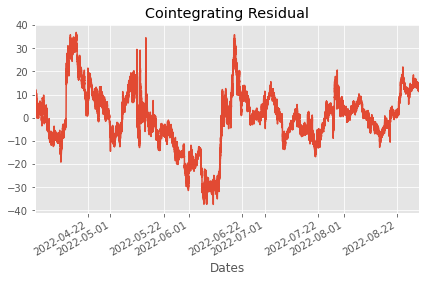

In [359]:
fig = eg_test.plot()

print('Cointegration Residual for BNB/BTC')

In [114]:
eg_test.cointegrating_vector

XBNUSD Curncy      1.000000
XBTUSD Curncy     -0.010318
const            105.292767
trend             -0.000005
dtype: float64

In [362]:
#btc eth 

eg_test = engle_granger(dff['XBTUSD Curncy'], dff['XETUSD Curncy'], trend='ct')

print('Engle Granger Test for BTC/ ETH: ', eg_test)

## NOT enough evidence to reject the null, no cointegration between BTC/ETH

Engle Granger Test for BTC/ ETH:  Engle-Granger Cointegration Test
Statistic: -2.950000651411758
P-value: 0.28869694550631186
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 15
Trend: c
Estimated Root ρ (γ+1): 0.999915972812754
Distribution Order: 1


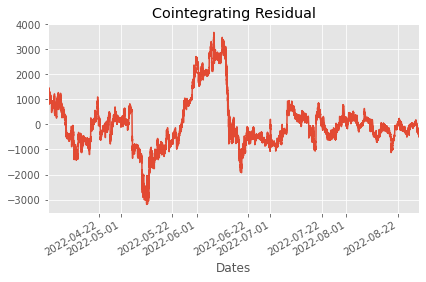

In [363]:
fig = eg_test.plot()

In [106]:
eg_test.cointegrating_vector

XBNUSD Curncy      1.000000
XBTUSD Curncy     -0.010318
const            105.292767
trend             -0.000005
dtype: float64

In [360]:
#btc bnb 

eg_test = engle_granger(dff['XBTUSD Curncy'], dff['XBNUSD Curncy'], trend='ct')

print('Engle Granger Test for BTC/ BNB: ', eg_test)

# reject the null and accept the alternative that a cointegration relationship exists between BTC/BNB

Engle Granger Test for BTC/ BNB:  Engle-Granger Cointegration Test
Statistic: -3.892168374037172
P-value: 0.03772186191221237
Null: No Cointegration, Alternative: Cointegration
ADF Lag length: 16
Trend: c
Estimated Root ρ (γ+1): 0.9997669968503741
Distribution Order: 1


Cointegration Residual for BTC/BNB


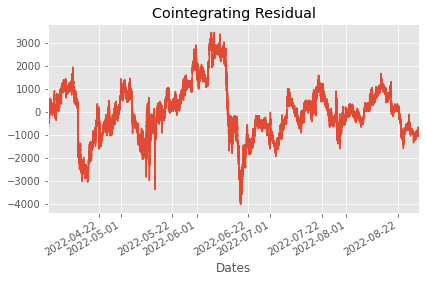

In [361]:
fig = eg_test.plot()

print('Cointegration Residual for BTC/BNB')

In [108]:
eg_test.cointegrating_vector

XBTUSD Curncy      1.000000e+00
XBNUSD Curncy     -1.014581e+02
const             -7.431707e+03
trend             -4.203145e-02
quadratic_trend    1.710391e-07
dtype: float64

#### Results of the EG test: 

- As we can observe by looking the p-values for all the tests conducted.

- ETH/BNB, BTC/BNB exhibit a cointegrated relationship. 